In [201]:
import pandas as pd
import matplotlib.pyplot as plt

In [202]:
SALES_FILEPATH = "продажи.csv"

In [203]:
class DataInterface:
    def __init__(self, dataframe: pd.DataFrame, encoding: str = "windows-1251"):
        try:
            self.dataframe = pd.read_csv(dataframe, encoding=encoding).dropna()
            self.dataframe["Дата"] = pd.to_datetime(self.dataframe["Дата"])
        except Exception as e:
            print(f"Error in dataframe load:\n{e}")

    def print_all_sales_data(self, view_print_count: int = 3, top: bool = True, unpopular: bool = True, median: bool = True, median_scatter: bool = True):
        # data type check
        assert isinstance(self.dataframe, pd.DataFrame)
        assert isinstance(view_print_count, int)
        assert isinstance(top, bool)
        assert isinstance(unpopular, bool)
        assert isinstance(median, bool)
        assert isinstance(median_scatter, bool)
    
        # data valid check
        assert view_print_count <= self.dataframe.index.max()
    
    
        print("3 позиции для показательного вывода имеющихся данных:")
        print(self.dataframe.head(view_print_count))
    
        if top:
            top_product = self.dataframe.groupby("Продукт")["Количество"].sum().idxmax()
            print(f"Самый популярный продукт на данный момент: {top_product}")
    
        if unpopular:
            most_unpopular_product = self.dataframe.groupby("Продукт")["Количество"].sum().idxmin()
            print(f"Самый не популярный продукт на данный момент: {most_unpopular_product}")
    
        if median or median_scatter:
            median_products = self.dataframe.groupby("Продукт")[["Количество", "Цена"]].median().sort_values(by="Количество")
        else:
            return
    
        if median:
            print(f"Медианы продаж и цен категорий товаров:\n{median_products.head()}")
    
        if median_scatter:
            plt.grid = True
            plt.title("График отношения медианы продаж и медианы цены за категорию товара")
            plt.xlabel("Медиана количества категории проданного товара")
            plt.ylabel("Медиана цены за категорию товара")
            plt.scatter(x=median_products["Количество"], y=median_products["Цена"])


    def display_sales_per_day(self, grid: bool = True):
        assert isinstance(self.dataframe, pd.DataFrame)
        assert isinstance(grid, bool)
    
        sales_per_day: pd.Series = self.dataframe.groupby("Дата")["Количество"].sum()
        sales_per_day.plot(xlabel="Дата", ylabel="Количество продаж", title="Всего продаж по дням", grid=grid)


    def print_revenue(self):
        assert isinstance(self.dataframe, pd.DataFrame)

        sold_products = self.dataframe.groupby(["Цена", "Продукт"])["Количество"].sum()
        products_revenue = pd.DataFrame({"Продукт": [], "Выручка": []})
    
        for (price, product), count in sold_products.items():
            products_revenue.loc[len(products_revenue.index)] = [product, price * count]
    
        products_revenue = products_revenue.groupby("Продукт")["Выручка"].sum()
    
        return products_revenue, products_revenue.sum()
    
    def print_median_checks(self, round_count: int = 2):
        assert isinstance(self.dataframe, pd.DataFrame)
        assert isinstance(round_count, int)
        assert round_count > 0
    
        products_median = self.dataframe.groupby(["Цена", "Продукт"])["Количество"].sum()
        products_revenue = pd.DataFrame({"Продукт": [], "Выручка": []})
    
        for (price, product), count in products_median.items():
            products_revenue.loc[len(products_revenue.index)] = [product, price * count]
    
        return round(products_revenue.groupby("Продукт")["Выручка"].mean(), round_count)


In [204]:
dataInterface = DataInterface(SALES_FILEPATH)

3 позиции для показательного вывода имеющихся данных:
        Дата   Продукт  Количество  Цена
0 2023-01-01    Лаптоп          10  1000
1 2023-01-01  Смартфон           5   500
2 2023-01-01   Ноутбук           8   800
Самый популярный продукт на данный момент: Лаптоп
Самый не популярный продукт на данный момент: Смартфон
Медианы продаж и цен категорий товаров:
          Количество    Цена
Продукт                     
Смартфон         4.5   520.0
Ноутбук          8.0   800.0
Планшет          9.0   300.0
Лаптоп          11.0  1025.0
Выручка за каждый тип продукта:
Продукт
Лаптоп      73700
Ноутбук     32950
Планшет     15360
Смартфон    18500
Name: Выручка, dtype: int64
Общая выручка: 140510


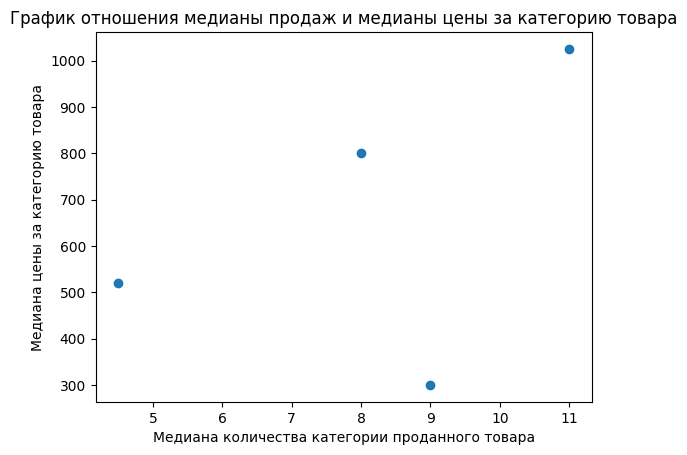

In [205]:
# Задача: вывод описательной статистики, самый популярный и не популярный продукт
dataInterface.print_all_sales_data()

products_revenue, total_revenue = dataInterface.print_revenue()

print(f"Выручка за каждый тип продукта:\n{products_revenue.head()}")
print(f"Общая выручка: {total_revenue}")

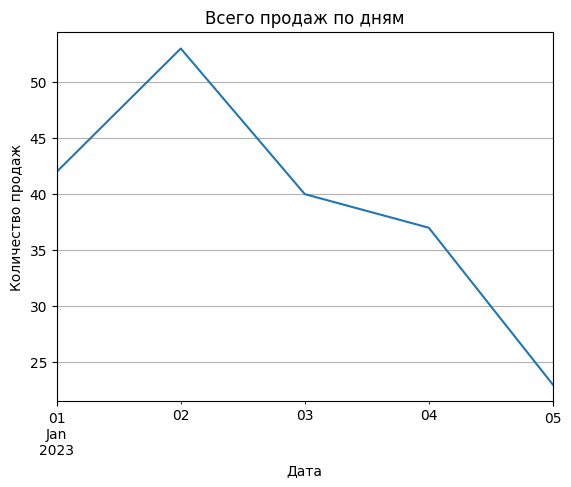

In [206]:
# Задача: вывод данных по дням
dataInterface.display_sales_per_day()

In [207]:
# Задача: расчет средних чеков
median_checks = dataInterface.print_median_checks()
print(f"Средние чеки по продажам за день: {median_checks}")

Средние чеки по продажам за день: Продукт
Лаптоп      24566.67
Ноутбук     16475.00
Планшет      7680.00
Смартфон     6166.67
Name: Выручка, dtype: float64


<Axes: title={'center': 'Выручка за категории продуктов'}, xlabel='Продукт', ylabel='Выручка'>

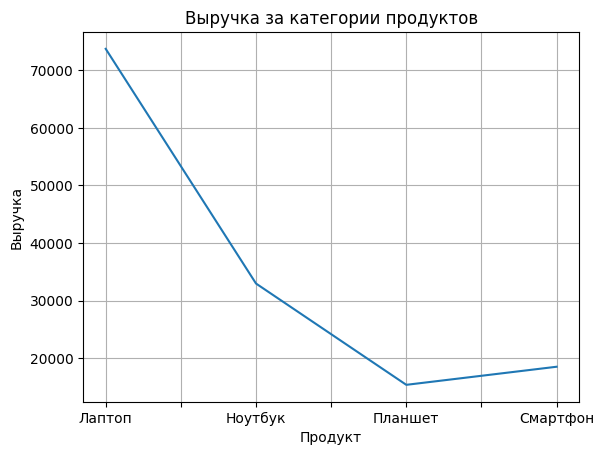

In [208]:
products_revenue.plot(title="Выручка за категории продуктов", xlabel="Продукт", ylabel="Выручка", grid=True)

<Axes: title={'center': 'Средние чеки по продажам по дням'}, xlabel='Продукт', ylabel='Средний чек'>

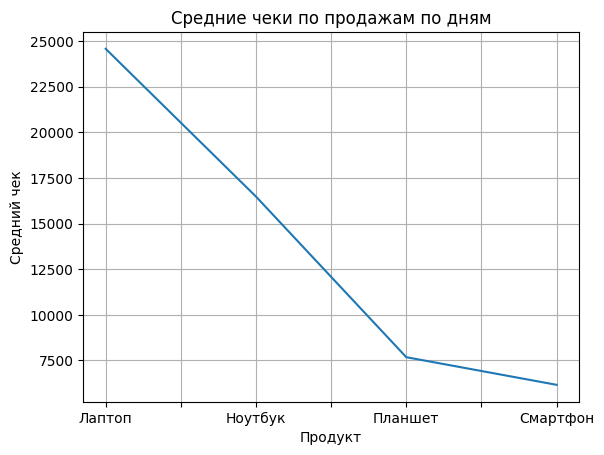

In [209]:
median_checks.plot(title="Средние чеки по продажам по дням", xlabel="Продукт", ylabel="Средний чек", grid=True)